Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

In [1]:
import os
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from data.auto_importer import AutoImporter, DataFrameDescriber, CompleteDescribeTable

In [3]:
root_path = Path(os.getcwd()).resolve().parent
sys.path.append(str(root_path))

In [4]:
root_path

WindowsPath('C:/Users/Felipe/Desktop/THE-BRIDGE/THEBRIDGE-BOOTCAMP-GITHUB/DS102024/3-MachineLearning/2-Supervisado/Ejercicios')

In [5]:
pd.set_option('display.max_columns', 500)

# Carga de datos

In [6]:
data = pd.read_csv(r'data/train.csv', index_col=False)

In [7]:
data

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,0.00,0.009,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,0.82,0.820,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,0.00,0.000,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,0.23,0.004,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,0.670,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,3048,0.01,8.92,0.20,4.88,0.050,0.36,0.09,0.54,0.14,0.27,0.004,0.069,8.60,1.90,0.007,17.18,2.91,0.08,0.43,0.09,0
5593,2130,0.09,1.36,0.04,3.45,0.003,3.42,0.03,1.39,1.12,0.10,0.001,0.108,9.36,1.58,0.009,42.15,4.39,0.02,0.11,0.07,0
5594,5005,0.10,4.95,0.01,0.25,0.040,0.09,0.10,1.88,0.33,0.00,0.007,0.021,18.78,0.62,0.007,5.97,0.32,0.10,0.10,0.08,0
5595,2125,0.05,23.18,0.04,3.65,0.001,4.43,0.63,1.94,1.27,0.08,0.008,0.194,13.32,1.93,0.005,23.84,4.80,0.08,0.22,0.07,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    5597 non-null   float64
 6   col6    5597 non-null   float64
 7   col7    5597 non-null   float64
 8   col8    5597 non-null   float64
 9   col9    5597 non-null   float64
 10  col10   5597 non-null   float64
 11  col11   5597 non-null   float64
 12  col12   5597 non-null   float64
 13  col13   5597 non-null   float64
 14  col14   5597 non-null   float64
 15  col15   5597 non-null   float64
 16  col16   5597 non-null   float64
 17  col17   5597 non-null   float64
 18  col18   5597 non-null   float64
 19  col19   5597 non-null   float64
 20  col20   5597 non-null   float64
 21  target  5597 non-null   int64  
dtype

In [9]:
inspeccion_inicial = AutoImporter(data)

In [10]:
inspeccion_inicial.inspeccion_inicial()

=== TAMAÑO Y ESTRUCTURA DE LOS DATOS ===
Número total de registros: 5597
Número de columnas: 22
Uso de memoria: 962.11 KB


=== TIPOS DE DATOS Y NOMBRES DE COLUMNAS ===
ID          int64
col1      float64
col2      float64
col3      float64
col4      float64
col5      float64
col6      float64
col7      float64
col8      float64
col9      float64
col10     float64
col11     float64
col12     float64
col13     float64
col14     float64
col15     float64
col16     float64
col17     float64
col18     float64
col19     float64
col20     float64
target      int64
dtype: object


Información detallada del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    559

In [11]:
df_descripcion = DataFrameDescriber(data)

In [12]:
df_descripcion.describe_numerico()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000
mean,3962.909952,0.674797,14.438840,0.163603,1.579702,0.042747,2.213093,0.250890,0.807654,0.766057,0.324309,0.329693,0.100050,9.819267,1.331880,0.005194,16.621249,2.931896,0.049602,0.149855,0.044999,0.114347
std,2311.129964,1.273677,8.851097,0.254659,1.221220,0.036072,2.581244,0.272472,0.652471,0.436435,0.328954,0.377353,0.057997,5.581795,0.568734,0.002960,17.729833,2.327347,0.028827,0.144170,0.026929,0.318261
min,0.000000,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1963.000000,0.040000,6.850000,0.030000,0.550000,0.008000,0.100000,0.050000,0.090000,0.400000,0.000000,0.002000,0.049000,4.940000,1.010000,0.003000,2.220000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,3922.000000,0.070000,14.390000,0.050000,1.210000,0.040000,0.550000,0.090000,0.750000,0.760000,0.230000,0.008000,0.103000,9.860000,1.420000,0.005000,7.840000,2.430000,0.050000,0.080000,0.050000,0.000000
75%,5960.000000,0.290000,22.260000,0.100000,2.510000,0.070000,4.330000,0.450000,1.390000,1.160000,0.610000,0.700000,0.151000,14.690000,1.760000,0.008000,29.980000,4.670000,0.070000,0.250000,0.070000,0.000000
max,7993.000000,5.050000,29.840000,1.050000,4.940000,0.130000,8.660000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.820000,2.890000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


El dataset no contiene valores nulos ni duplicados. Todas las variables son numéricas y los tipos de datos de cada columna son correctos.

Cuenta con un total de 22 columnas: una de identificación (ID), que no aporta información relevante para el análisis, 20 con valores de tipo flotante y una columna objetivo (target) con valores enteros, lo que sugiere un problema de clasificación.

Algunas columnas posieden deviación estándar alto sugieren alta variabilidad de los datos.

<Axes: >

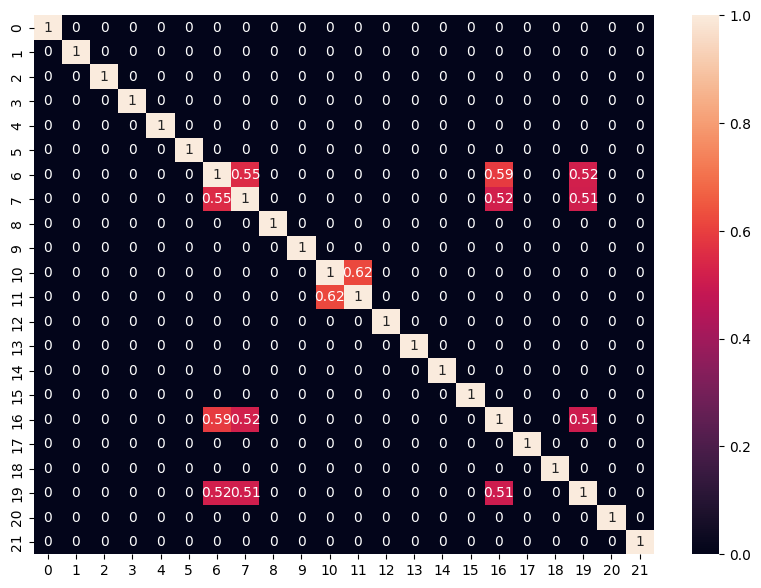

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(np.where(data.corr(numeric_only=True) >.5,data.corr(numeric_only=True), 0), annot=True)

El análisis del heatmap de correlación muestra que las variables del dataset tienen una baja correlación entre sí.  
Esto puede ser positivo si cada variable aporta información única al modelo, evitando la redundancia en los datos.  
Sin embargo, también podría indicar que las características no están fuertemente relacionadas con la variable objetivo (target), lo que podría dificultar la capacidad del modelo para realizar predicciones precisas.

In [14]:
data['target'].value_counts()

target
0    4957
1     640
Name: count, dtype: int64

In [15]:
data['target'].value_counts()/len(data['target'])*100

target
0    88.565303
1    11.434697
Name: count, dtype: float64

<Axes: xlabel='target', ylabel='count'>

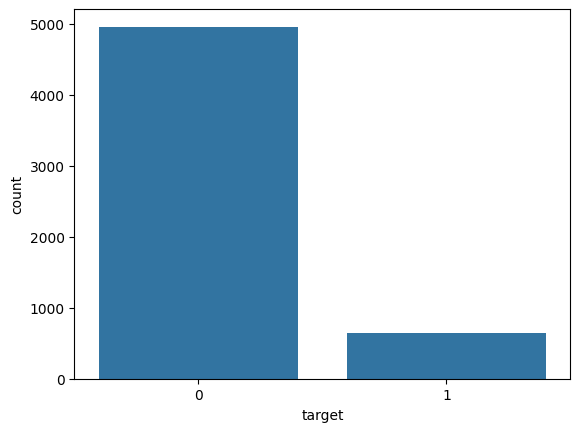

In [16]:
sns.countplot(x=data['target'])

La variable target es binaria, lo que confirma que se trata de un problema de clasificación. Además, existe un claro desbalance en los datos, con una mayor proporción de la clase negativa (valores = 0) en comparación con la clase positiva.

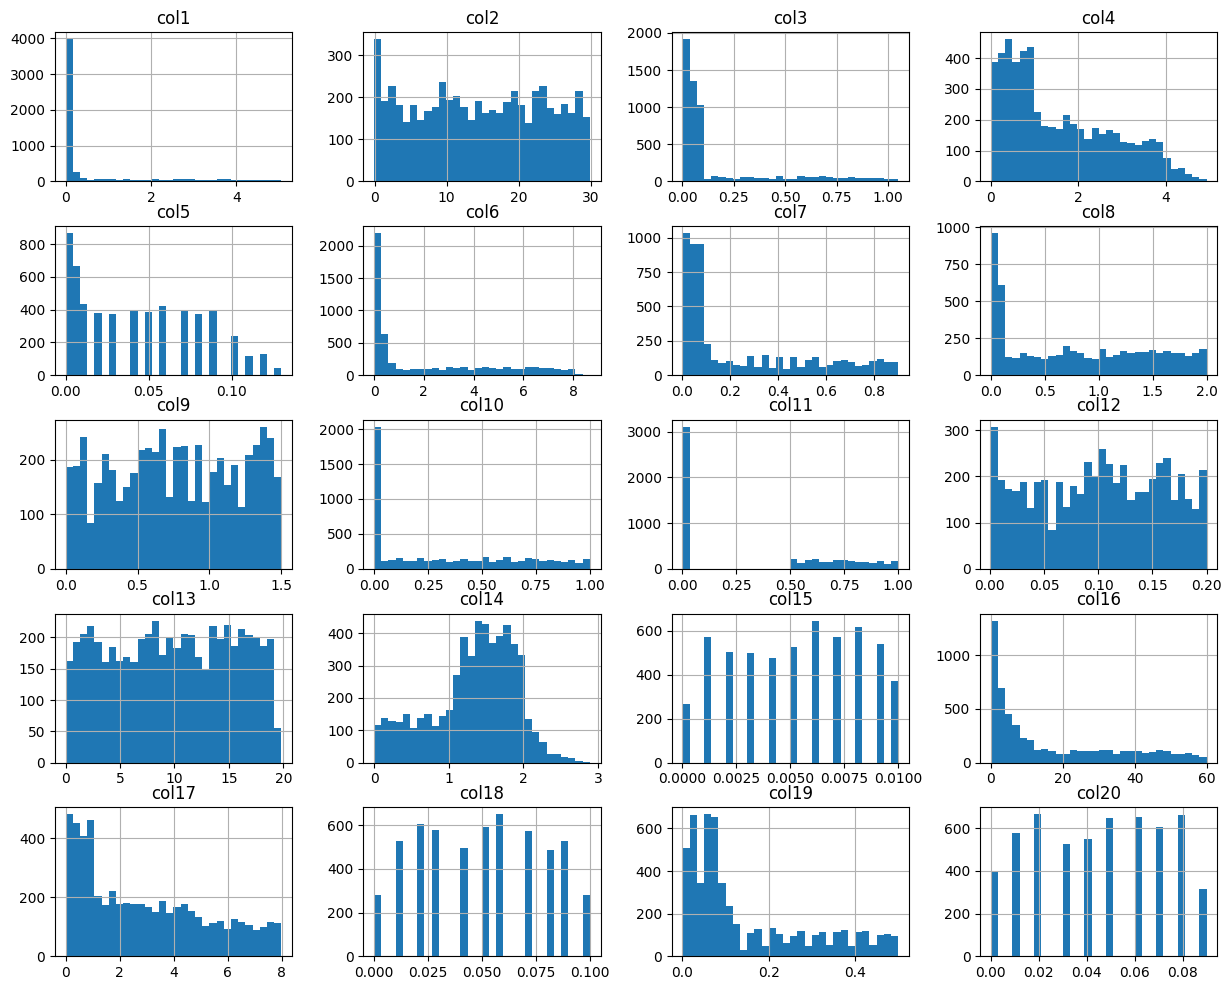

In [17]:
data.drop(columns=["ID", "target"]).hist(figsize=(15, 12), bins=30)
plt.show()

<Axes: >

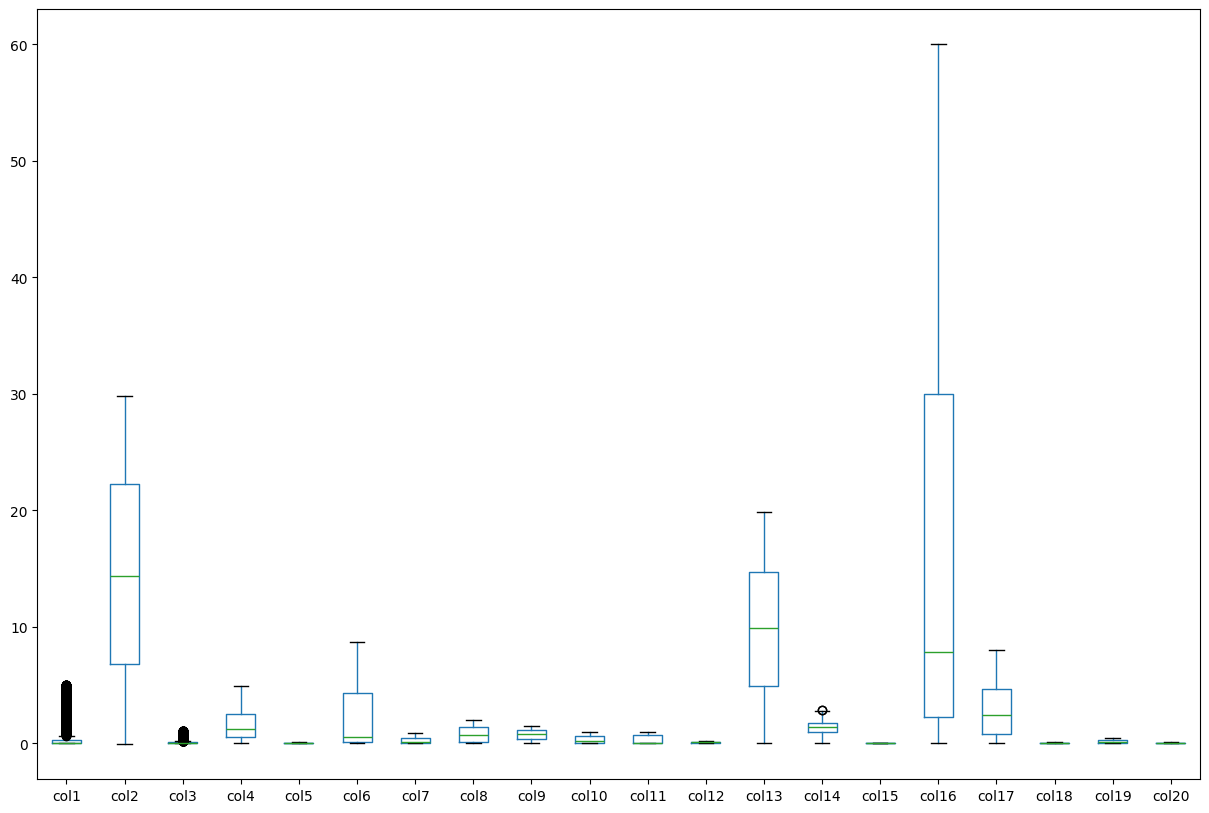

In [18]:
data.drop(columns=["ID", "target"]).boxplot(figsize=(15, 10), grid=False)

Distribución Sesgada: Varias columnas presentan distribuciones sesgadas hacia la izquierda (col1, col3, col6, col7, col10, col11, col12), lo que indica que la mayoría de los valores son pequeños y hay pocos valores grandes.

Distribución Uniforme: Algunas variables muestran una distribución bastante uniforme, como col2, col9, col13 y col16, lo que sugiere que los valores están bien distribuidos en su rango.

Valores Concentrados en un Rango Específico: Algunas variables tienen valores concentrados en un pequeño rango con algunos valores atípicos (col14, col15, col19, col20).

Presencia de Posibles Valores Atípicos: Se pueden observar algunas variables con valores extremadamente altos en comparación con el resto de los datos.

Posible Normalización o Escalado: Muchas variables parecen estar en un rango cercano a 0 y 1 (col3, col5, col7, col11, col14, col15, col19, col20), lo que sugiere que los datos pueden haber sido normalizados.

In [19]:
X = data.drop(columns=['ID','target'])
y = data['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Las features fueron escaladas utilizando RobustScaler, un método elegido por su menor sensibilidad a los valores atípicos, los cuales están presentes en algunas features. Este tipo de escalado garantiza que todas las características contribuyan de manera equitativa al modelo y puede mejorar el rendimiento de muchos algoritmos de aprendizaje automático.

A continuación, se presentan los modelos de ``ML`` seleccionados para realizar las predicciones. Posteriormente, se comparará el rendimiento de cada modelo para determinar cuál ofrece la mejor precisión en la predicción de los datos.

In [22]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

Función que entrena y evalúa los modelos mencionados anteriormente, guardando sus métricas de rendimiento para su posterior comparación.

In [23]:
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    
    results[name] = {
        "model": model,
        "accuracy": accuracy_score(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training SVM...
Training XGBoost...


c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:46:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Función que imprime el informe de clasificación y la matriz de confusión, para que se pueda comparar.


--- Logistic Regression ---
Accuracy: 0.9098214285714286
Classification Report:
 {'0': {'precision': 0.9246901811248809, 'recall': 0.9778225806451613, 'f1-score': 0.9505144536991671, 'support': 992.0}, '1': {'precision': 0.6901408450704225, 'recall': 0.3828125, 'f1-score': 0.49246231155778897, 'support': 128.0}, 'accuracy': 0.9098214285714286, 'macro avg': {'precision': 0.8074155130976517, 'recall': 0.6803175403225806, 'f1-score': 0.721488382628478, 'support': 1120.0}, 'weighted avg': {'precision': 0.897884542718657, 'recall': 0.9098214285714286, 'f1-score': 0.8981656374544382, 'support': 1120.0}}


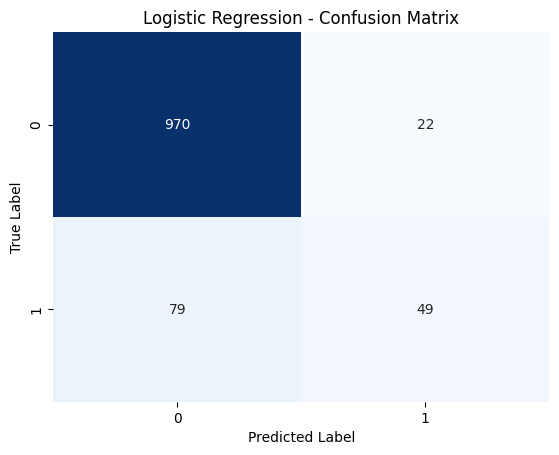


--- Decision Tree ---
Accuracy: 0.9357142857142857
Classification Report:
 {'0': {'precision': 0.9655870445344129, 'recall': 0.9616935483870968, 'f1-score': 0.9636363636363636, 'support': 992.0}, '1': {'precision': 0.7121212121212122, 'recall': 0.734375, 'f1-score': 0.7230769230769231, 'support': 128.0}, 'accuracy': 0.9357142857142857, 'macro avg': {'precision': 0.8388541283278126, 'recall': 0.8480342741935484, 'f1-score': 0.8433566433566433, 'support': 1120.0}, 'weighted avg': {'precision': 0.9366195208300472, 'recall': 0.9357142857142857, 'f1-score': 0.9361438561438561, 'support': 1120.0}}


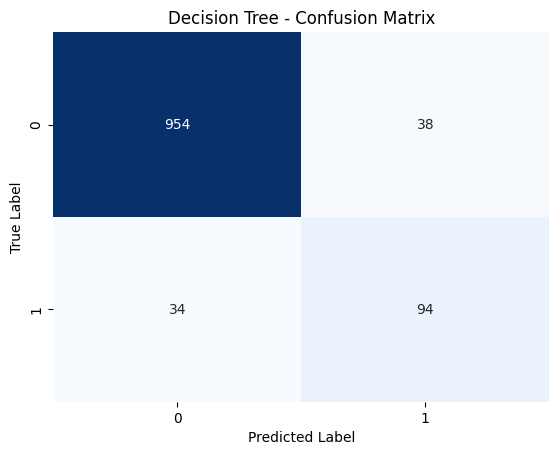


--- Random Forest ---
Accuracy: 0.9580357142857143
Classification Report:
 {'0': {'precision': 0.9591836734693877, 'recall': 0.9949596774193549, 'f1-score': 0.9767441860465116, 'support': 992.0}, '1': {'precision': 0.945054945054945, 'recall': 0.671875, 'f1-score': 0.7853881278538812, 'support': 128.0}, 'accuracy': 0.9580357142857143, 'macro avg': {'precision': 0.9521193092621664, 'recall': 0.8334173387096775, 'f1-score': 0.8810661569501964, 'support': 1120.0}, 'weighted avg': {'precision': 0.9575689616505942, 'recall': 0.9580357142857143, 'f1-score': 0.9548749222530682, 'support': 1120.0}}


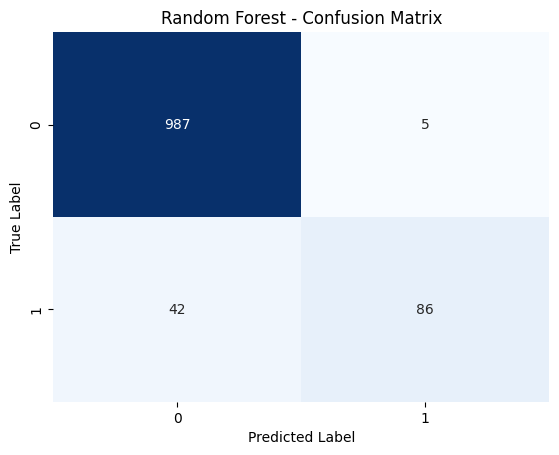


--- SVM ---
Accuracy: 0.9482142857142857
Classification Report:
 {'0': {'precision': 0.9525193798449613, 'recall': 0.9909274193548387, 'f1-score': 0.9713438735177866, 'support': 992.0}, '1': {'precision': 0.8977272727272727, 'recall': 0.6171875, 'f1-score': 0.7314814814814815, 'support': 128.0}, 'accuracy': 0.9482142857142857, 'macro avg': {'precision': 0.9251233262861169, 'recall': 0.8040574596774194, 'f1-score': 0.851412677499634, 'support': 1120.0}, 'weighted avg': {'precision': 0.9462574247457969, 'recall': 0.9482142857142857, 'f1-score': 0.9439310287136375, 'support': 1120.0}}


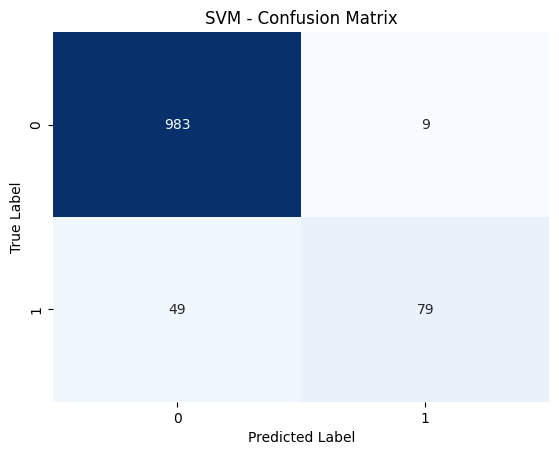


--- XGBoost ---
Accuracy: 0.9669642857142857
Classification Report:
 {'0': {'precision': 0.9695181907571289, 'recall': 0.9939516129032258, 'f1-score': 0.9815828770532603, 'support': 992.0}, '1': {'precision': 0.941747572815534, 'recall': 0.7578125, 'f1-score': 0.8398268398268398, 'support': 128.0}, 'accuracy': 0.9669642857142857, 'macro avg': {'precision': 0.9556328817863314, 'recall': 0.8758820564516129, 'f1-score': 0.9107048584400501, 'support': 1120.0}, 'weighted avg': {'precision': 0.9663444058495182, 'recall': 0.9669642857142857, 'f1-score': 0.9653821870845265, 'support': 1120.0}}


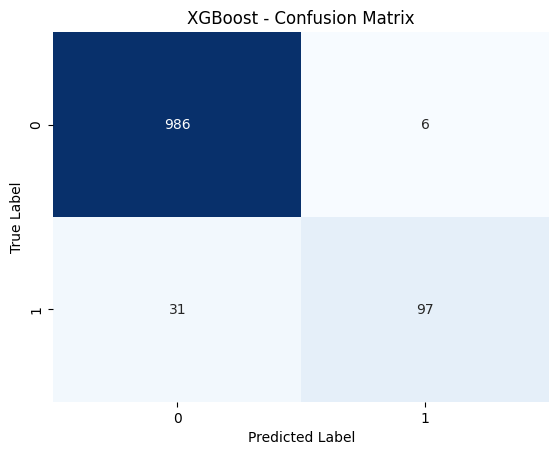

In [24]:
for name, result in results.items():
    print(f"\n--- {name} ---")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:\n", result['classification_report'])


    plt.figure()
    sns.heatmap(result['confusion_matrix'], annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

____________________________________

Importación dataset de test para realizar las predicciones

In [25]:
data_test = pd.read_csv(r'data/test.csv', index_col=False)

In [26]:
data_test

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20
0,2816,0.06,25.18,0.04,0.04,0.001,5.10,0.86,1.23,0.52,0.62,0.620,0.022,12.63,1.93,0.003,1.19,7.79,0.04,0.43,0.01
1,3641,0.09,27.51,0.63,2.05,0.110,6.81,0.83,0.09,1.21,0.73,0.730,0.001,4.49,1.95,0.009,52.30,1.00,0.10,0.12,0.01
2,7191,0.09,1.10,0.07,0.73,0.050,0.10,0.01,1.44,1.42,0.31,0.007,0.177,1.03,1.27,0.002,7.04,0.38,0.06,0.05,0.06
3,5199,0.07,11.23,0.04,1.22,0.030,0.16,0.03,1.18,0.88,0.00,0.001,0.032,4.07,0.98,0.003,1.28,0.51,0.06,0.03,0.07
4,7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,7300,0.06,0.60,0.02,0.46,0.090,0.20,0.08,0.70,0.57,0.30,0.005,0.065,16.31,2.12,0.008,2.73,3.53,0.03,0.07,0.03
2395,1327,2.99,11.76,0.64,2.71,0.010,2.36,0.57,1.81,0.38,0.00,0.006,0.083,7.72,1.67,0.007,12.99,6.11,0.05,0.24,0.00
2396,4739,0.08,10.53,0.09,2.97,0.010,0.65,0.05,0.04,1.38,0.00,0.005,0.033,7.43,0.62,0.007,4.49,0.50,0.09,0.05,0.02
2397,2611,0.08,9.74,0.01,0.22,0.001,4.50,0.66,0.01,0.56,0.43,0.002,0.185,15.38,1.24,0.003,43.87,3.36,0.05,0.04,0.08


Arreglando el nuevo dataset

In [27]:
data_test = data_test.drop(columns='ID')
data_test_scaled = scaler.transform(data_test)

El XGBoost obtuvo los mejores resultados entre todos los modelos utilizados, por esta razón utilizaremos dicho modelo para las predicciones

In [28]:
best_model = results['XGBoost']['model']

In [29]:
predictions = best_model.predict(data_test_scaled)

Array con las predicciones

In [30]:
predictions

array([0, 0, 0, ..., 1, 0, 1])